In [0]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [0]:
weather = pd.read_csv('https://raw.githubusercontent.com/dominicwhite/cherryblossoms/master/weather.csv')
blossom = pd.read_csv('https://raw.githubusercontent.com/dominicwhite/cherryblossoms/master/blossoms.csv')

In [4]:
weather.head()

,date,tempHi,tempLo,tempAv,precip
0,1992-01-01,43,36,28.0,0
1,1992-01-02,46,42,39.0,0
2,1992-01-03,55,50,44.0,0.06
3,1992-01-04,50,48,46.0,1.84
4,1992-01-05,53,47,41.0,0


In [0]:
weather.tail()

,date,tempHi,tempLo,tempAv,precip
9492,2017-12-27,33,26,19.0,0
9493,2017-12-28,25,21,16.0,0
9494,2017-12-29,32,26,19.0,0
9495,2017-12-30,33,28,22.0,0.03
9496,2017-12-31,23,20,16.0,0


In [0]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9497 entries, 0 to 9496
Data columns (total 5 columns):
date      9497 non-null datetime64[ns]
tempHi    9497 non-null int64
tempLo    9497 non-null object
tempAv    9497 non-null float64
precip    9497 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 371.1+ KB


In [0]:
blossom.head()

,Year,Green Color in Buds,Florets Visible,Extension of Florets,Peduncle Elongation,Puffy White,Peak Bloom
0,2017,2/24,3/1,3/6,3/8,3/22,3/25
1,2016,3/8,3/13,3/15,3/17,3/22,3/25
2,2015,3/18,4/1,4/4,4/6,4/8,4/10
3,2014,3/16,3/23,3/31,4/4,4/7,4/10
4,2013,3/11,3/17,3/26,3/31,4/4,4/9


In [0]:
blossom.tail()

,Year,Green Color in Buds,Florets Visible,Extension of Florets,Peduncle Elongation,Puffy White,Peak Bloom,green_color_days,florets_vis_days,ext_florets_days,pedun_elong_days,puffy_white_days,peak_bloom_days
21,1996,2/1,3/15,3/18,3/25,3/30,4/4,0,0,0,0,0,0
22,1995,3/8,3/17,3/20,3/22,3/27,4/2,0,0,0,0,0,0
23,1994,3/8,3/20,3/25,3/29,4/1,4/5,0,0,0,0,0,0
24,1993,3/15,3/22,3/28,4/2,4/5,4/11,0,0,0,0,0,0
25,1992,3/7,3/15,3/23,3/31,4/1,4/5,0,0,0,0,0,0


In [0]:
weather['date'] = pd.to_datetime(weather['date'])
#weather[weather['date'].dt.year == 2017]

In [0]:
blossom['green_color_days'] = 0
blossom['florets_vis_days'] = 0
blossom['ext_florets_days'] = 0
blossom['pedun_elong_days'] = 0
blossom['puffy_white_days'] = 0
blossom['peak_bloom_days'] = 0
blossom.head()

,Year,Green Color in Buds,Florets Visible,Extension of Florets,Peduncle Elongation,Puffy White,Peak Bloom,green_color_days,florets_vis_days,ext_florets_days,pedun_elong_days,puffy_white_days,peak_bloom_days
0,2017,2/24,3/1,3/6,3/8,3/22,3/25,0,0,0,0,0,0
1,2016,3/8,3/13,3/15,3/17,3/22,3/25,0,0,0,0,0,0
2,2015,3/18,4/1,4/4,4/6,4/8,4/10,0,0,0,0,0,0
3,2014,3/16,3/23,3/31,4/4,4/7,4/10,0,0,0,0,0,0
4,2013,3/11,3/17,3/26,3/31,4/4,4/9,0,0,0,0,0,0


In [0]:
def days(year, month, day):
    dt = datetime.date(year, month, day)
    return (dt - datetime.date(year, 1, 1)).days + 1

In [0]:
for idx, row in blossom.iterrows():
    year = row[0]
    for c in range(1, 7):
        [month, day] = [int(i) for i in row[c].split('/')]
        blossom.iloc[idx, c+6] = days(year, month, day)
blossom.head()

,Year,Green Color in Buds,Florets Visible,Extension of Florets,Peduncle Elongation,Puffy White,Peak Bloom,green_color_days,florets_vis_days,ext_florets_days,pedun_elong_days,puffy_white_days,peak_bloom_days
0,2017,2/24,3/1,3/6,3/8,3/22,3/25,55,60,65,67,81,84
1,2016,3/8,3/13,3/15,3/17,3/22,3/25,68,73,75,77,82,85
2,2015,3/18,4/1,4/4,4/6,4/8,4/10,77,91,94,96,98,100
3,2014,3/16,3/23,3/31,4/4,4/7,4/10,75,82,90,94,97,100
4,2013,3/11,3/17,3/26,3/31,4/4,4/9,70,76,85,90,94,99


In [0]:
msk = np.random.rand(len(blossom)) < 0.8
train = blossom[msk]
test = blossom[~msk]
print (len(train), len(test))

23 3


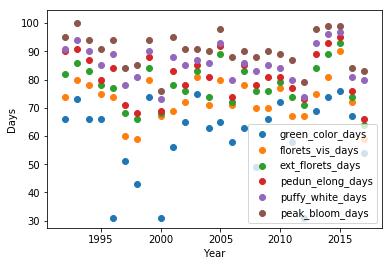

In [0]:
for i in range(7,13):
    plt.scatter(blossom['Year'], blossom.iloc[:,i], label=list(blossom)[i])
    plt.xlabel("Year")
    plt.ylabel("Days")
plt.legend()

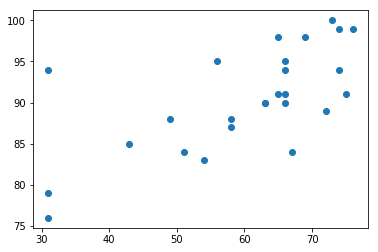

In [0]:
plt.scatter(blossom['green_color_days'],blossom['peak_bloom_days'])

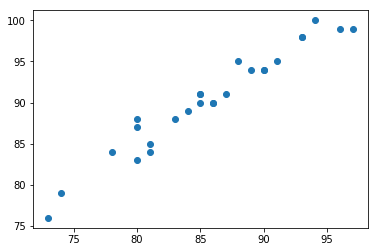

In [0]:
plt.scatter(blossom['puffy_white_days'],blossom['peak_bloom_days'])

# Investigating the weather

In [0]:
climate = pd.DataFrame()
climate['Year'] = np.arange(2017,1991,-1)
climate['sub_zero_av'] = 0
climate['over_zero_av'] = 0
climate['sub_zero_days'] = 0
climate['over_zero_days'] = 0


for idx, row in climate.iterrows():
    year = row[0]
    year_weather = weather.loc[weather['date'].dt.year == year]
    bloom_days = int(blossom.loc[blossom['Year'] == year]['peak_bloom_days'])
    #print(bloom_days)
    weather_pre_bloom = year_weather.iloc[:bloom_days,:]
    #print(len(weather_pre_bloom))
    climate.loc[idx, 'sub_zero_av'] = len(weather_pre_bloom.loc[weather_pre_bloom['tempAv'] < 33])
    climate.loc[idx, 'over_zero_av'] = len(weather_pre_bloom.loc[weather_pre_bloom['tempAv'] >32])
    climate.loc[idx, 'sub_zero_days'] = len(weather_pre_bloom.loc[weather_pre_bloom['tempHi'] < 33])
    climate.loc[idx, 'over_zero_days'] = len(weather_pre_bloom.loc[weather_pre_bloom['tempHi'] > 32])
    #climate.loc[idx, 'sub_zero_nights'] = len(weather_pre_bloom.loc[weather_pre_bloom['tempLo'] < 33])
    #climate.loc[idx, 'over_zero_nights'] = len(weather_pre_bloom.loc[weather_pre_bloom['tempLo'] >32])
    #print(len(freezing))
    #break
climate

,Year,sub_zero_av,over_zero_av,sub_zero_days,over_zero_days
0,2017,28,55,3,80
1,2016,41,43,10,74
2,2015,54,45,13,86
3,2014,59,40,10,89
4,2013,35,63,4,94
5,2012,23,56,1,78
6,2011,49,38,3,84
7,2010,44,45,9,80
8,2009,57,33,9,81
9,2008,32,56,2,86


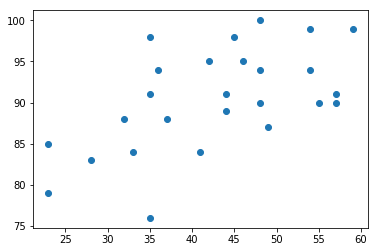

In [0]:
plt.scatter(climate['sub_zero_av'], blossom['peak_bloom_days'])

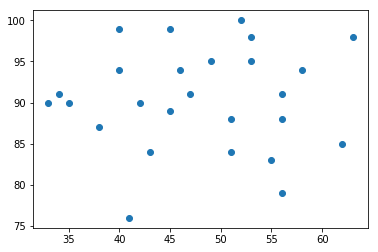

In [0]:
plt.scatter(climate['over_zero_av'], blossom['peak_bloom_days'])

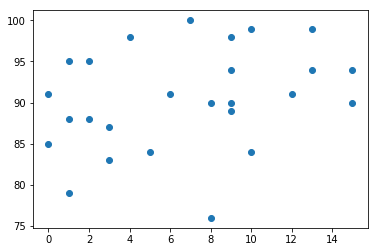

In [0]:
plt.scatter(climate['sub_zero_days'], blossom['peak_bloom_days'])

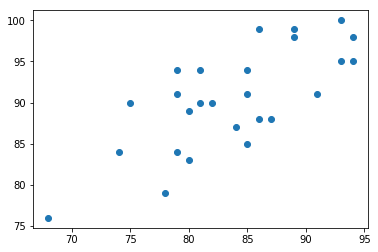

In [0]:
plt.scatter(climate['over_zero_days'], blossom['peak_bloom_days'])

In [0]:
climate['sub_zero_days_30'] = 0
climate['over_zero_days_30'] = 0
climate['sub_zero_days_60'] = 0
climate['over_zero_days_60'] = 0
climate['sub_zero_days_90'] = 0
climate['over_zero_days_90'] = 0

for idx, row in climate.iterrows():
    year = row[0]
    year_weather = weather.loc[weather['date'].dt.year == year]
    bloom_days = int(blossom.loc[blossom['Year'] == year]['peak_bloom_days'])
    weather_30 = year_weather.iloc[:30,:]
    climate.loc[idx, 'sub_zero_days_30'] = len(weather_30.loc[weather_30['tempAv'] < 33])
    climate.loc[idx, 'over_zero_days_30'] = len(weather_30.loc[weather_30['tempAv'] >32])
    weather_60 = year_weather.iloc[30:60,:]
    climate.loc[idx, 'sub_zero_days_60'] = len(weather_60.loc[weather_60['tempAv'] < 33])
    climate.loc[idx, 'over_zero_days_60'] = len(weather_60.loc[weather_60['tempAv'] >32])
    weather_90 = year_weather.iloc[60:90,:]
    climate.loc[idx, 'sub_zero_days_90'] = len(weather_90.loc[weather_90['tempAv'] < 33])
    climate.loc[idx, 'over_zero_days_90'] = len(weather_90.loc[weather_90['tempAv'] >32])
    #print(len(freezing))
    #break
climate

,Year,sub_zero_av,over_zero_av,sub_zero_days,over_zero_days,sub_zero_days_30,over_zero_days_30,sub_zero_days_60,over_zero_days_60,sub_zero_days_90,over_zero_days_90
0,2017,28,55,3,80,7,23,9,21,12,18
1,2016,41,43,10,74,23,7,15,15,3,27
2,2015,54,45,13,86,20,10,27,3,7,23
3,2014,59,40,10,89,24,6,20,10,15,15
4,2013,35,63,4,94,13,17,14,16,7,23
5,2012,23,56,1,78,16,14,5,25,2,28
6,2011,49,38,3,84,25,5,17,13,7,23
7,2010,44,45,9,80,22,8,22,8,0,30
8,2009,57,33,9,81,28,2,22,8,7,23
9,2008,32,56,2,86,14,16,16,14,2,28


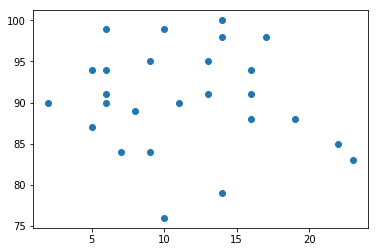

In [0]:
plt.scatter(climate['over_zero_days_30'], blossom['peak_bloom_days'])

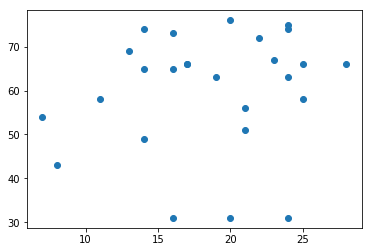

In [0]:
plt.scatter(climate['sub_zero_days_30'], blossom['green_color_days'])

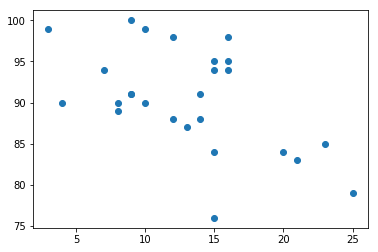

In [0]:
plt.scatter(climate['over_zero_days_60'], blossom['peak_bloom_days'])

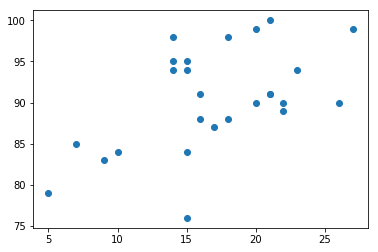

In [0]:
plt.scatter(climate['sub_zero_days_60'], blossom['peak_bloom_days'])

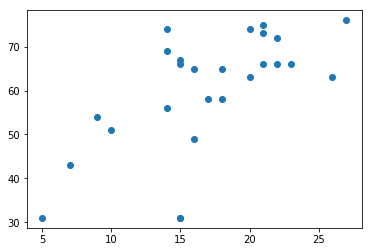

In [0]:
plt.scatter(climate['sub_zero_days_60'], blossom['green_color_days'])

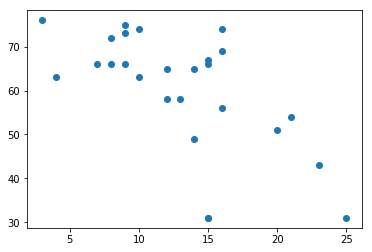

In [0]:
plt.scatter(climate['over_zero_days_60'], blossom['green_color_days'])

In [0]:
weather_plus = pd.read_csv('weather.csv')
weather_plus['date'] = pd.to_datetime(weather_plus['date'])
weather_plus['day_count'] = wp_17['date'].transform(lambda x: days(x.year, x.month, x.day))
weather_plus = weather_plus[(weather_plus['date'].dt.year == 2017) & (weather_plus['day_count'] <= 120)].copy()
weather_plus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 9132 to 9251
Data columns (total 6 columns):
date         120 non-null datetime64[ns]
tempHi       120 non-null int64
tempLo       120 non-null object
tempAv       120 non-null float64
precip       120 non-null object
day_count    120 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 6.6+ KB


In [0]:
weather_plus.describe()

,tempHi,tempAv
count,365.000000,365.000000
mean,69.164384,52.454795
std,17.105212,16.064816
min,23.000000,15.000000
25%,56.000000,39.000000
50%,72.000000,54.000000
75%,83.000000,67.000000
max,98.000000,81.000000


In [0]:
weather_plus.head()

,date,tempHi,tempLo,tempAv,precip,day_count
9132,2017-01-01,55,46,37.0,0.04,1
9133,2017-01-02,45,43,41.0,0.24,2
9134,2017-01-03,46,44,43.0,0.79,3
9135,2017-01-04,57,47,36.0,0,4
9136,2017-01-05,37,34,30.0,0,5


In [0]:
blossom.head()

,Year,Green Color in Buds,Florets Visible,Extension of Florets,Peduncle Elongation,Puffy White,Peak Bloom,green_color_days,florets_vis_days,ext_florets_days,pedun_elong_days,puffy_white_days,peak_bloom_days
0,2017,2/24,3/1,3/6,3/8,3/22,3/25,55,60,65,67,81,84
1,2016,3/8,3/13,3/15,3/17,3/22,3/25,68,73,75,77,82,85
2,2015,3/18,4/1,4/4,4/6,4/8,4/10,77,91,94,96,98,100
3,2014,3/16,3/23,3/31,4/4,4/7,4/10,75,82,90,94,97,100
4,2013,3/11,3/17,3/26,3/31,4/4,4/9,70,76,85,90,94,99


In [0]:
def calculate_if_occurred(row, col):
#     print(row.day_count)
#     print(blossom[blossom.Year == row.date.year])
    if row.day_count < int(blossom[blossom.Year == row.date.year][col]):
        return 0
#     elif row.day_count > int(blossom[blossom.Year == row.date.year]['peak_bloom_days'])+1:
#         return 2
    else:
        return 1

In [0]:
binary_states = {
    'is_green_buds':'green_color_days',
    'is_florets_visible': 'florets_vis_days',
    'is_florets_extended': 'ext_florets_days',
    'is_peduncle_elongated': 'pedun_elong_days',
    'is_pufffy_white': 'puffy_white_days',
    'is_peak_bloom': 'peak_bloom_days'
}

for state in binary_states.keys():
    weather_plus[state] = weather_plus.apply(calculate_if_occurred, axis=1, args=(binary_states[state],))
# weather_plus['is_florets_visible'] = weather_plus.apply(calculate_days_since, axis=1, args=('florets_vis_days',))
# weather_plus['is_florets_extended'] = weather_plus.apply(calculate_days_since, axis=1, args=('ext_florets_days',))
# weather_plus['is_peduncle_elongated'] = weather_plus.apply(calculate_days_since, axis=1, args=('pedun_elong_days',))
# weather_plus['is_pufffy_white'] = weather_plus.apply(calculate_days_since, axis=1, args=('puffy_white_days',))
# weather_plus['is_peak_bloom'] = weather_plus.apply(calculate_days_since, axis=1, args=('peak_bloom_days',))
weather_plus.iloc[30:,:]

,date,tempHi,tempLo,tempAv,precip,day_count,is_green_buds,is_florets_visible,is_florets_extended,is_peduncle_elongated,is_pufffy_white,is_peak_bloom
9162,2017-01-31,56,42,28.0,T,31.0,0,0,0,0,0,0
9163,2017-02-01,51,43,34.0,0,32.0,0,0,0,0,0,0
9164,2017-02-02,50,43,36.0,0,33.0,0,0,0,0,0,0
9165,2017-02-03,40,35,30.0,0,34.0,0,0,0,0,0,0
9166,2017-02-04,41,33,24.0,0,35.0,0,0,0,0,0,0
9167,2017-02-05,54,43,32.0,0,36.0,0,0,0,0,0,0
9168,2017-02-06,61,47,33.0,0,37.0,0,0,0,0,0,0
9169,2017-02-07,73,61,48.0,T,38.0,0,0,0,0,0,0
9170,2017-02-08,74,63,51.0,T,39.0,0,0,0,0,0,0
9171,2017-02-09,53,39,25.0,0.12,40.0,0,0,0,0,0,0


In [0]:
# features to add:
#  - days since: florets, green buds
#  - hours above/below 0, 10, etc. for that day
#  - cumulative hours above/below 0, 10, etc. for year before that day
#  - rolling average of hours above/below 0, 10, etc. in past day, week, fortnight
#  - cumulative rain
#  - transform trace rain to 0 (or 0.01?)

# Y: days until peak bloom (negative after the event)

# metric:
#  - try penalizing differently, e.g. penalize closer days more heavily if they're wrong.


# How to predict?
#  final model is going to take in historical data + forecasted weather
#     - will have to simulate weather many times
#  

# How to display?
#  most likely date
#  timeline of events
#    -> below that, show historical variation of each event's prediction